In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df1 = pd.read_csv('data/냉간단조_데이터셋_unique1_drop.csv')

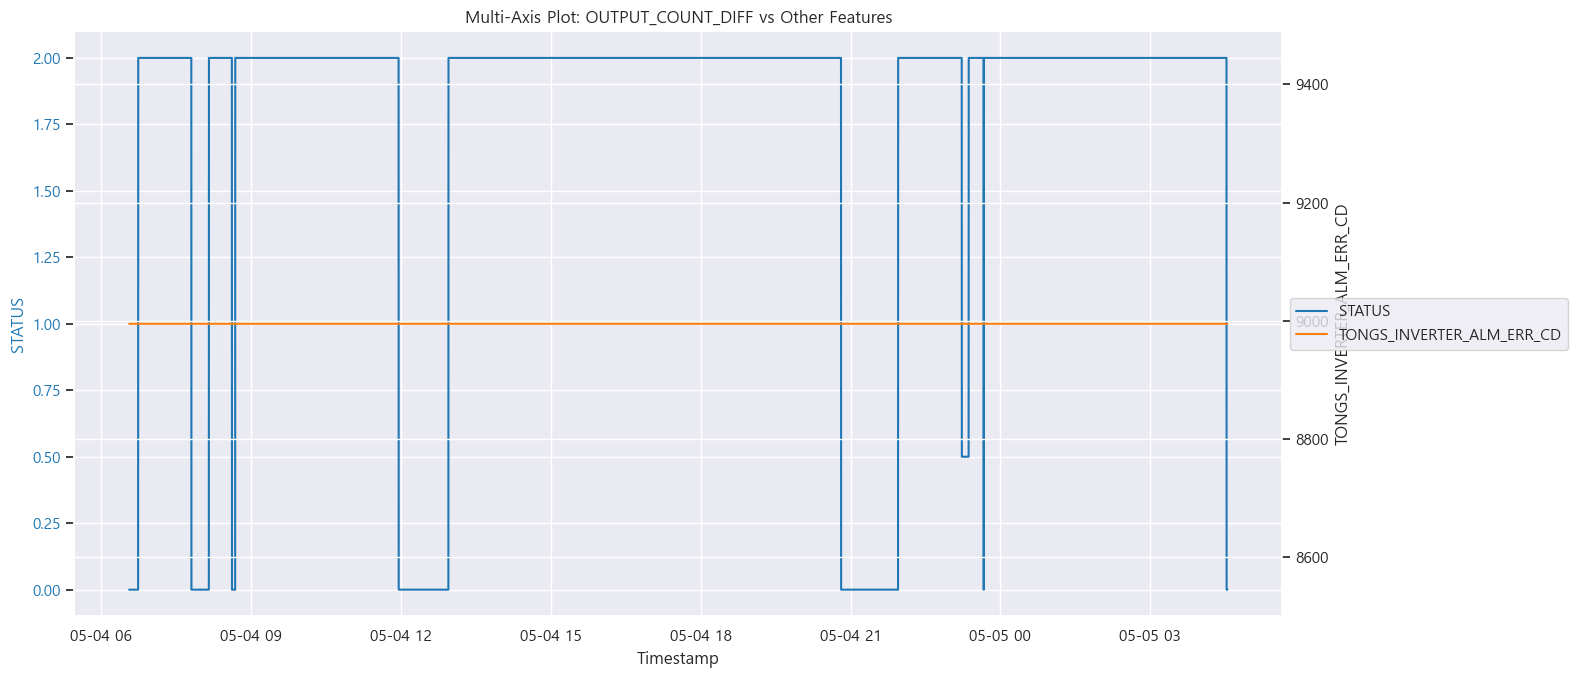

In [9]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['STATUS']
right_y_cols = ['TONGS_INVERTER_ALM_ERR_CD']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

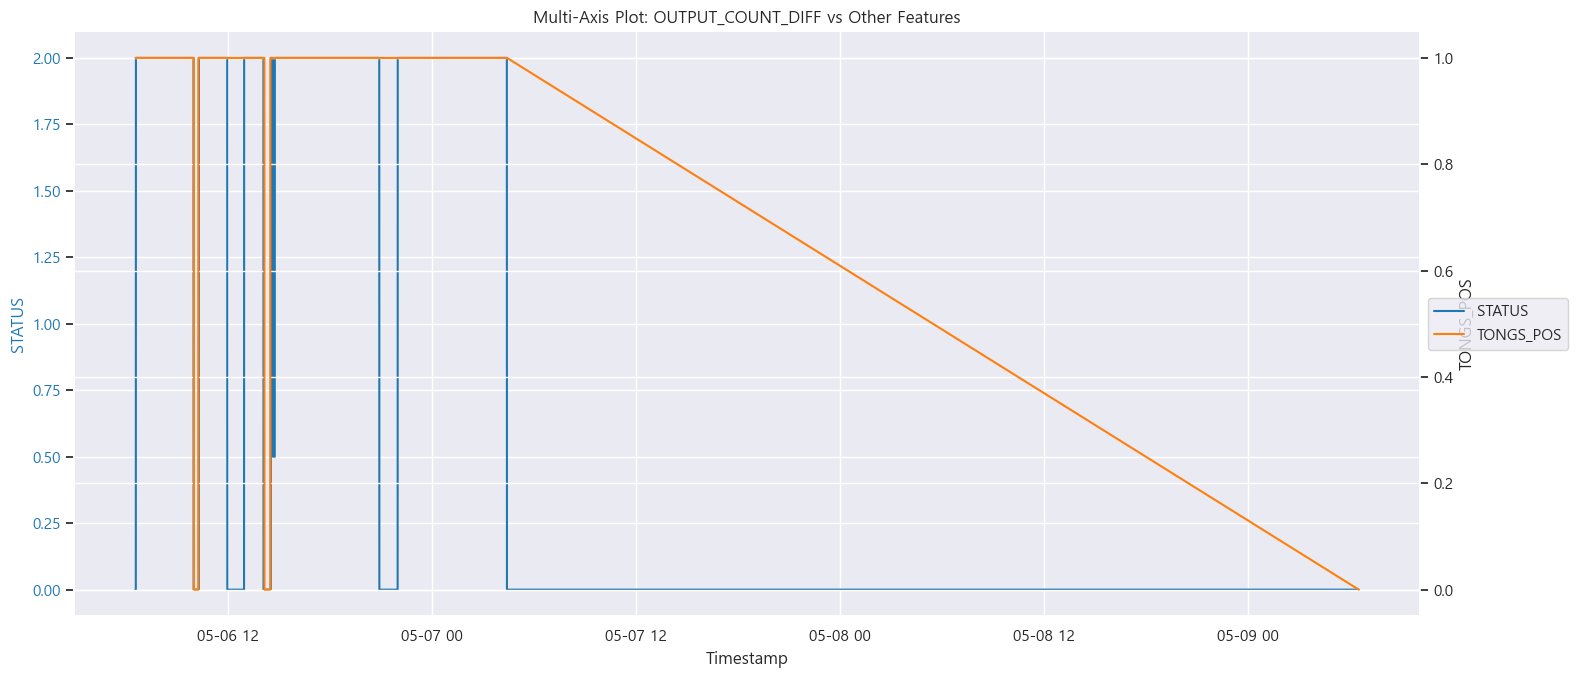

In [8]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['STATUS']
right_y_cols = ['TONGS_POS']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### oil

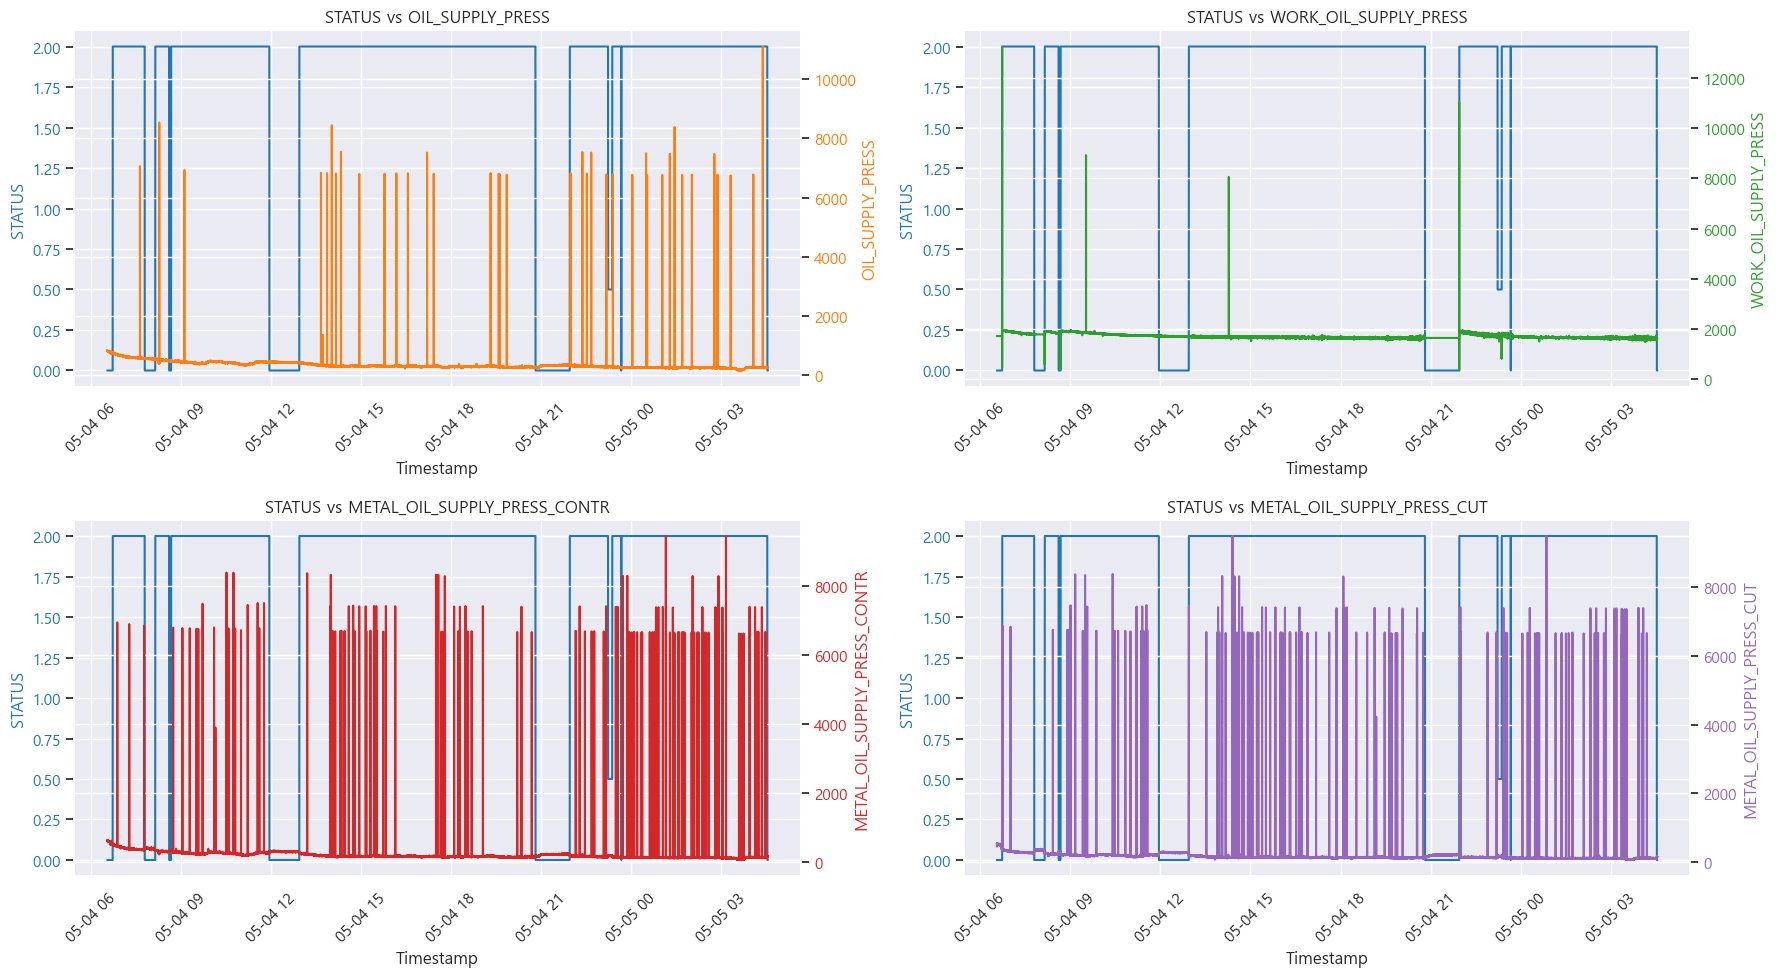

In [5]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['OIL_SUPPLY_PRESS', 'WORK_OIL_SUPPLY_PRESS', 'METAL_OIL_SUPPLY_PRESS_CONTR', 'METAL_OIL_SUPPLY_PRESS_CUT']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

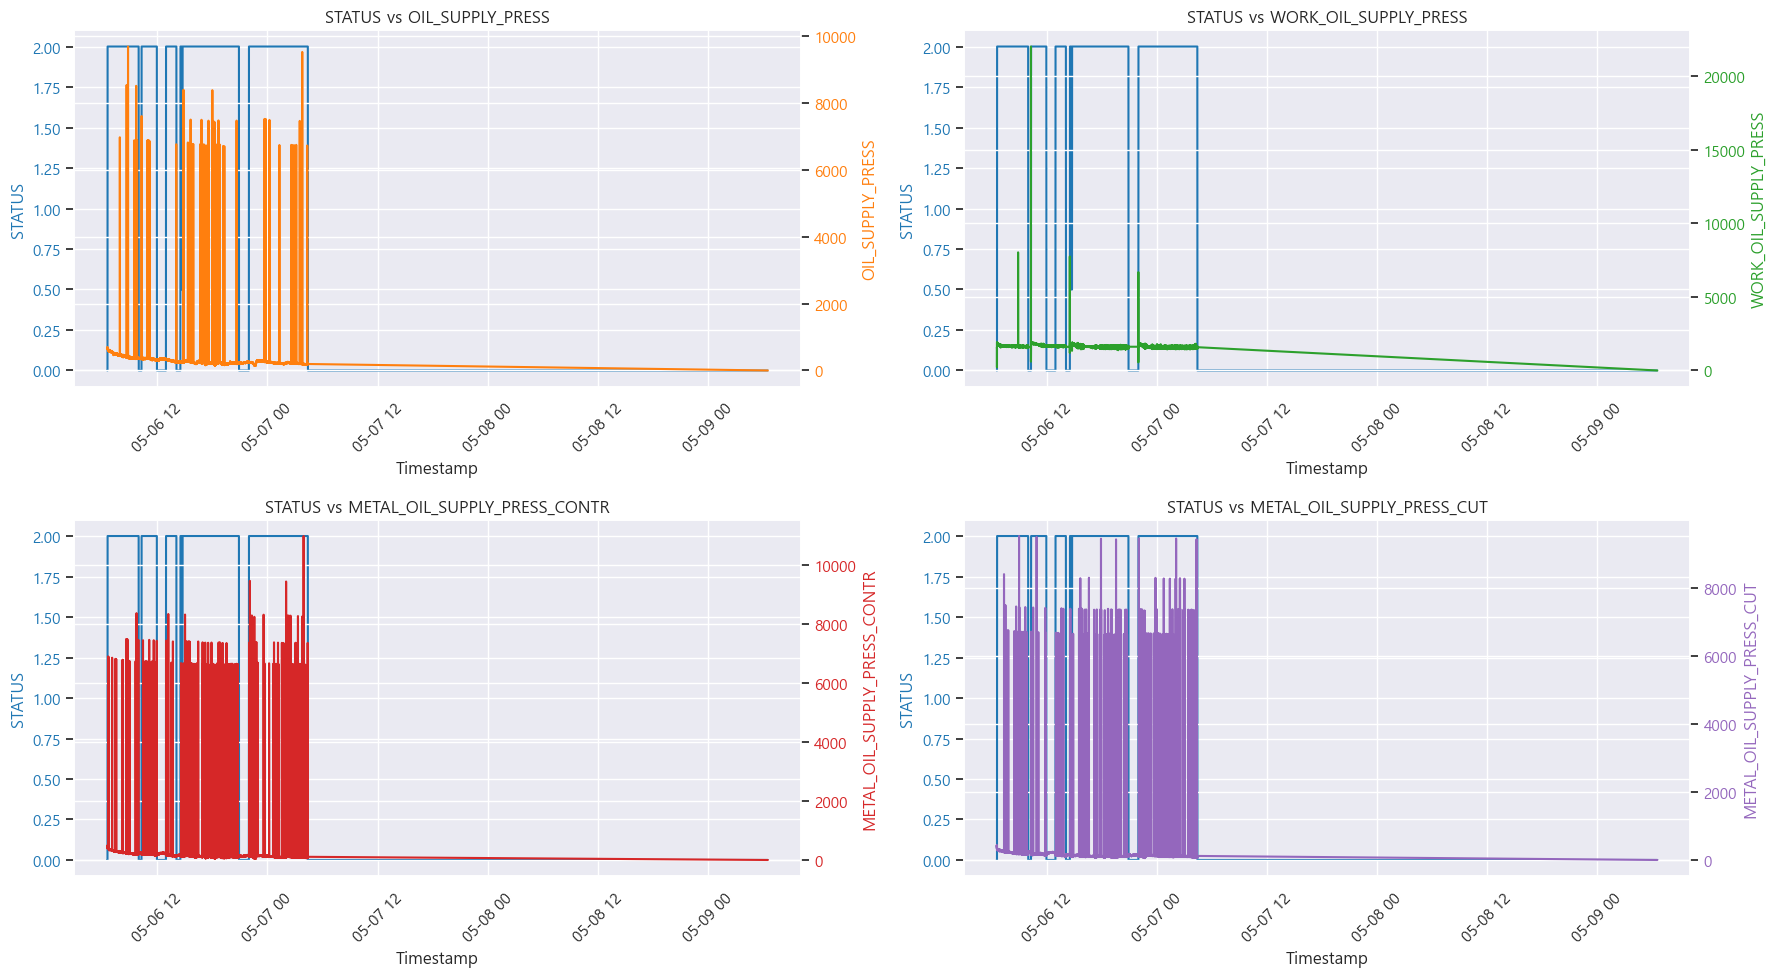

In [6]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['OIL_SUPPLY_PRESS', 'WORK_OIL_SUPPLY_PRESS', 'METAL_OIL_SUPPLY_PRESS_CONTR', 'METAL_OIL_SUPPLY_PRESS_CUT']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### main motor

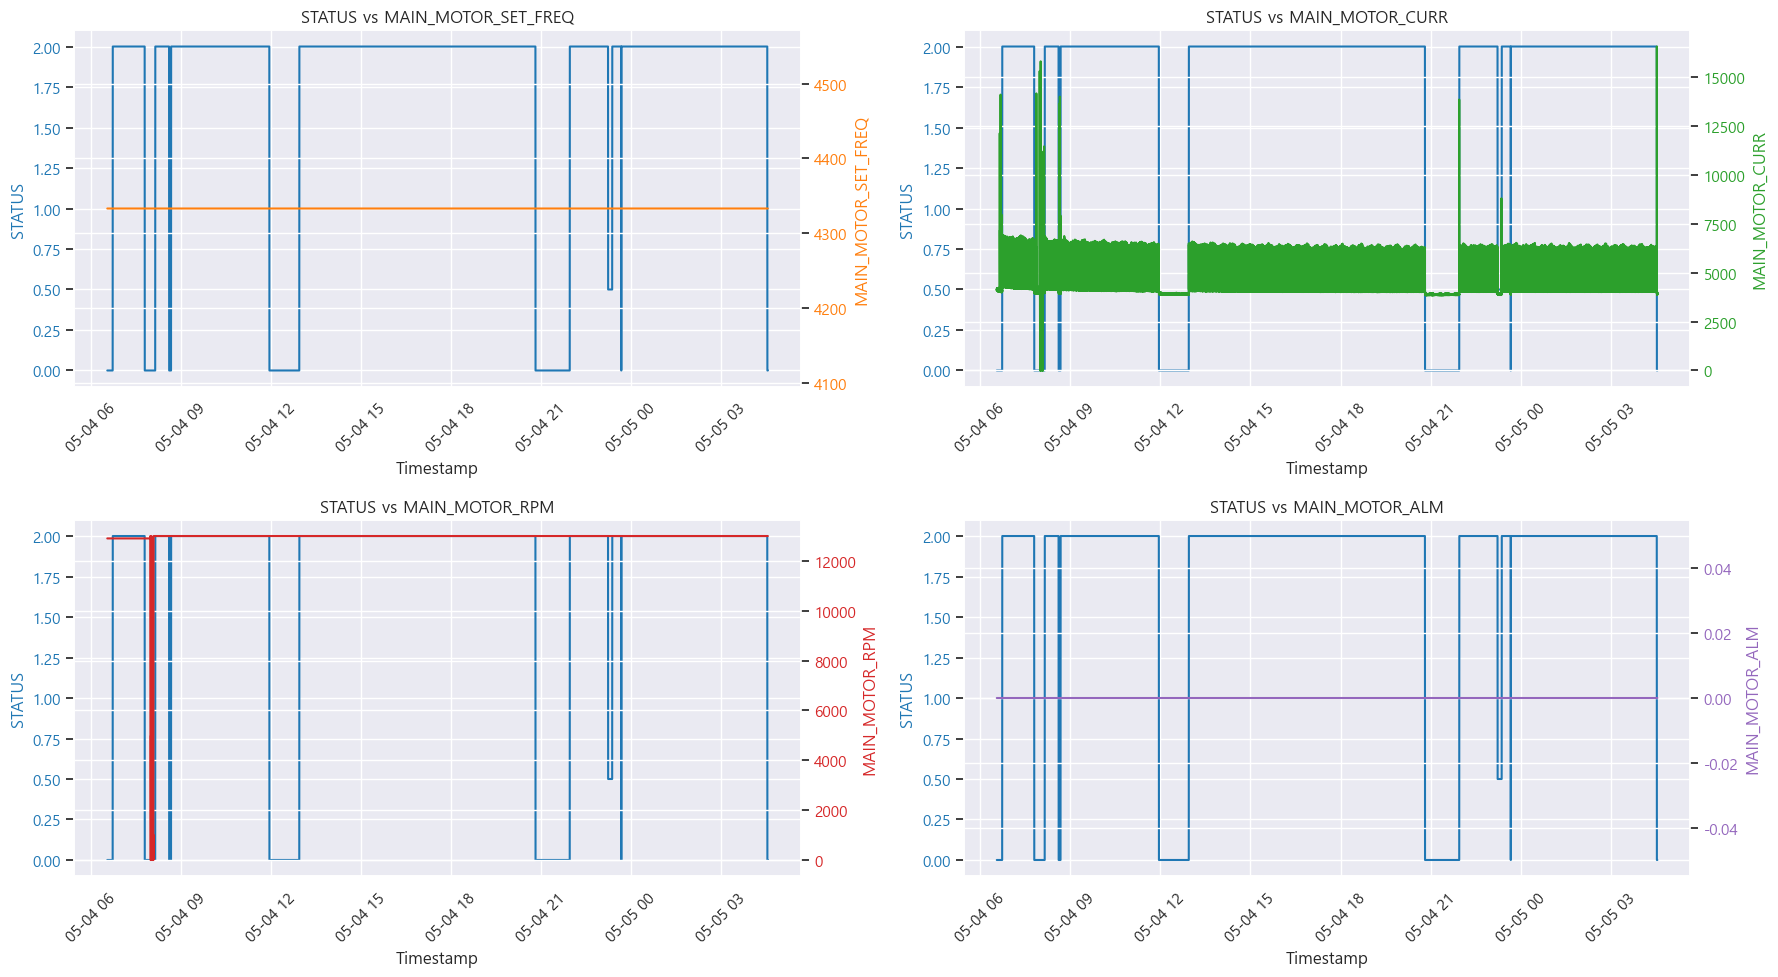

In [45]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['MAIN_MOTOR_SET_FREQ', 'MAIN_MOTOR_CURR', 'MAIN_MOTOR_RPM', 'MAIN_MOTOR_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

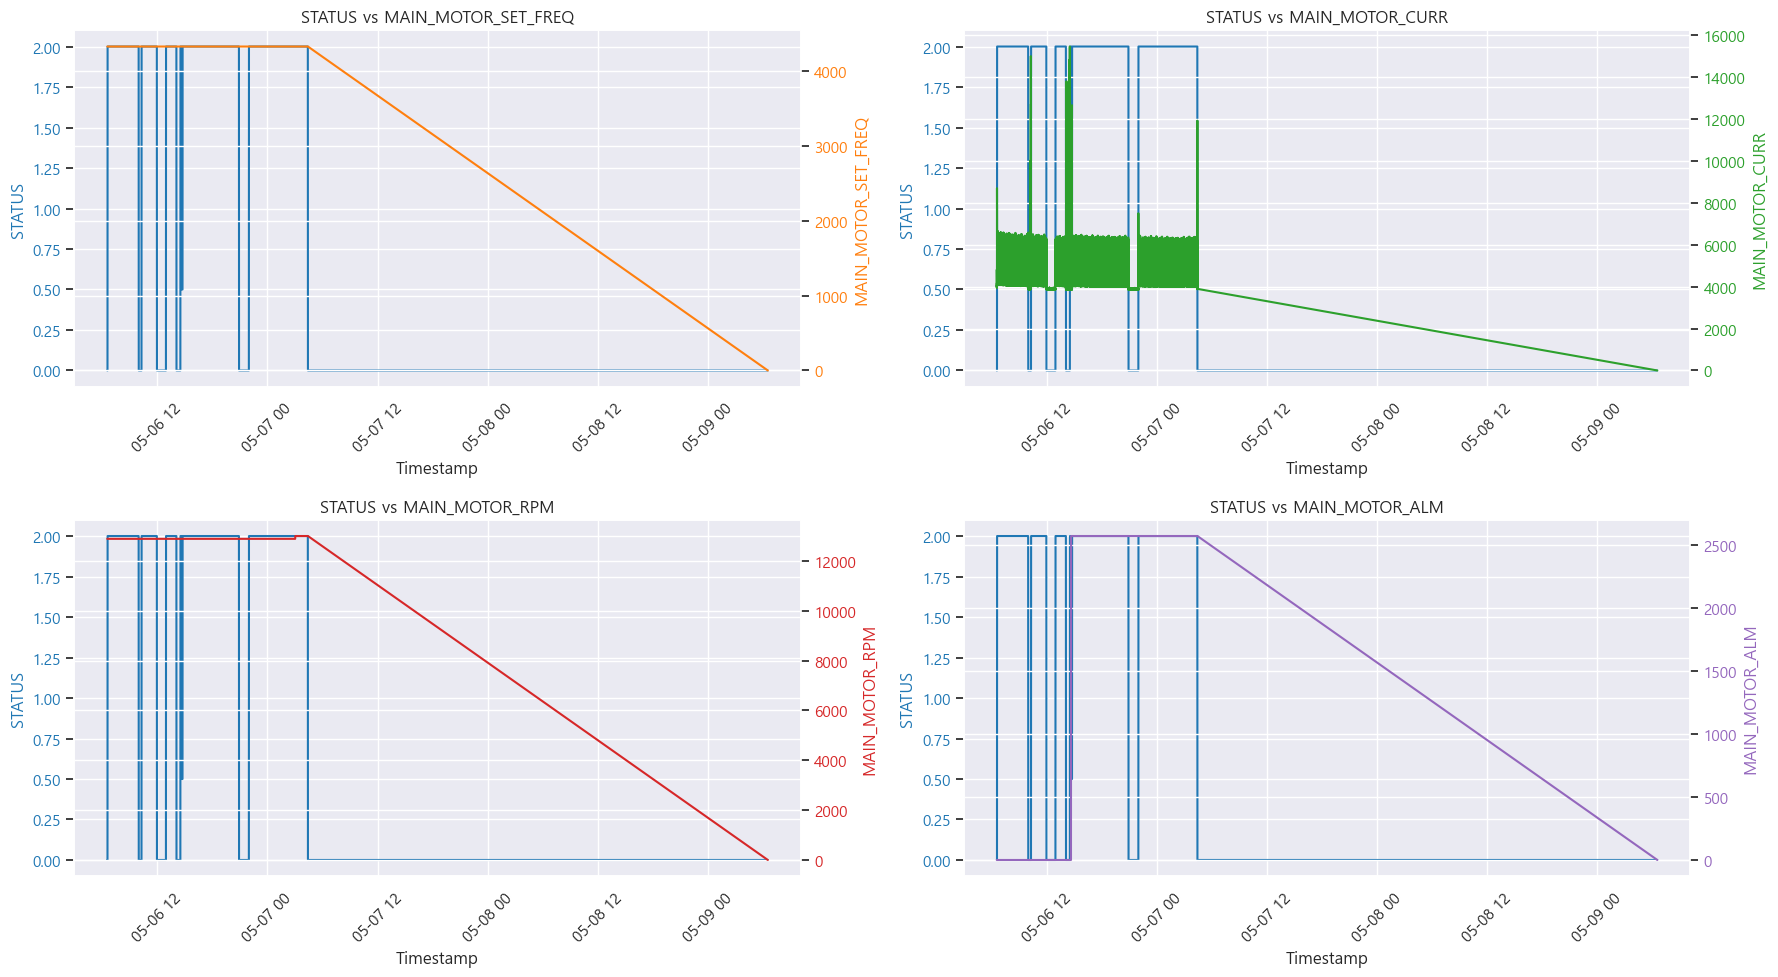

In [46]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['MAIN_MOTOR_SET_FREQ', 'MAIN_MOTOR_CURR', 'MAIN_MOTOR_RPM', 'MAIN_MOTOR_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### TONGS

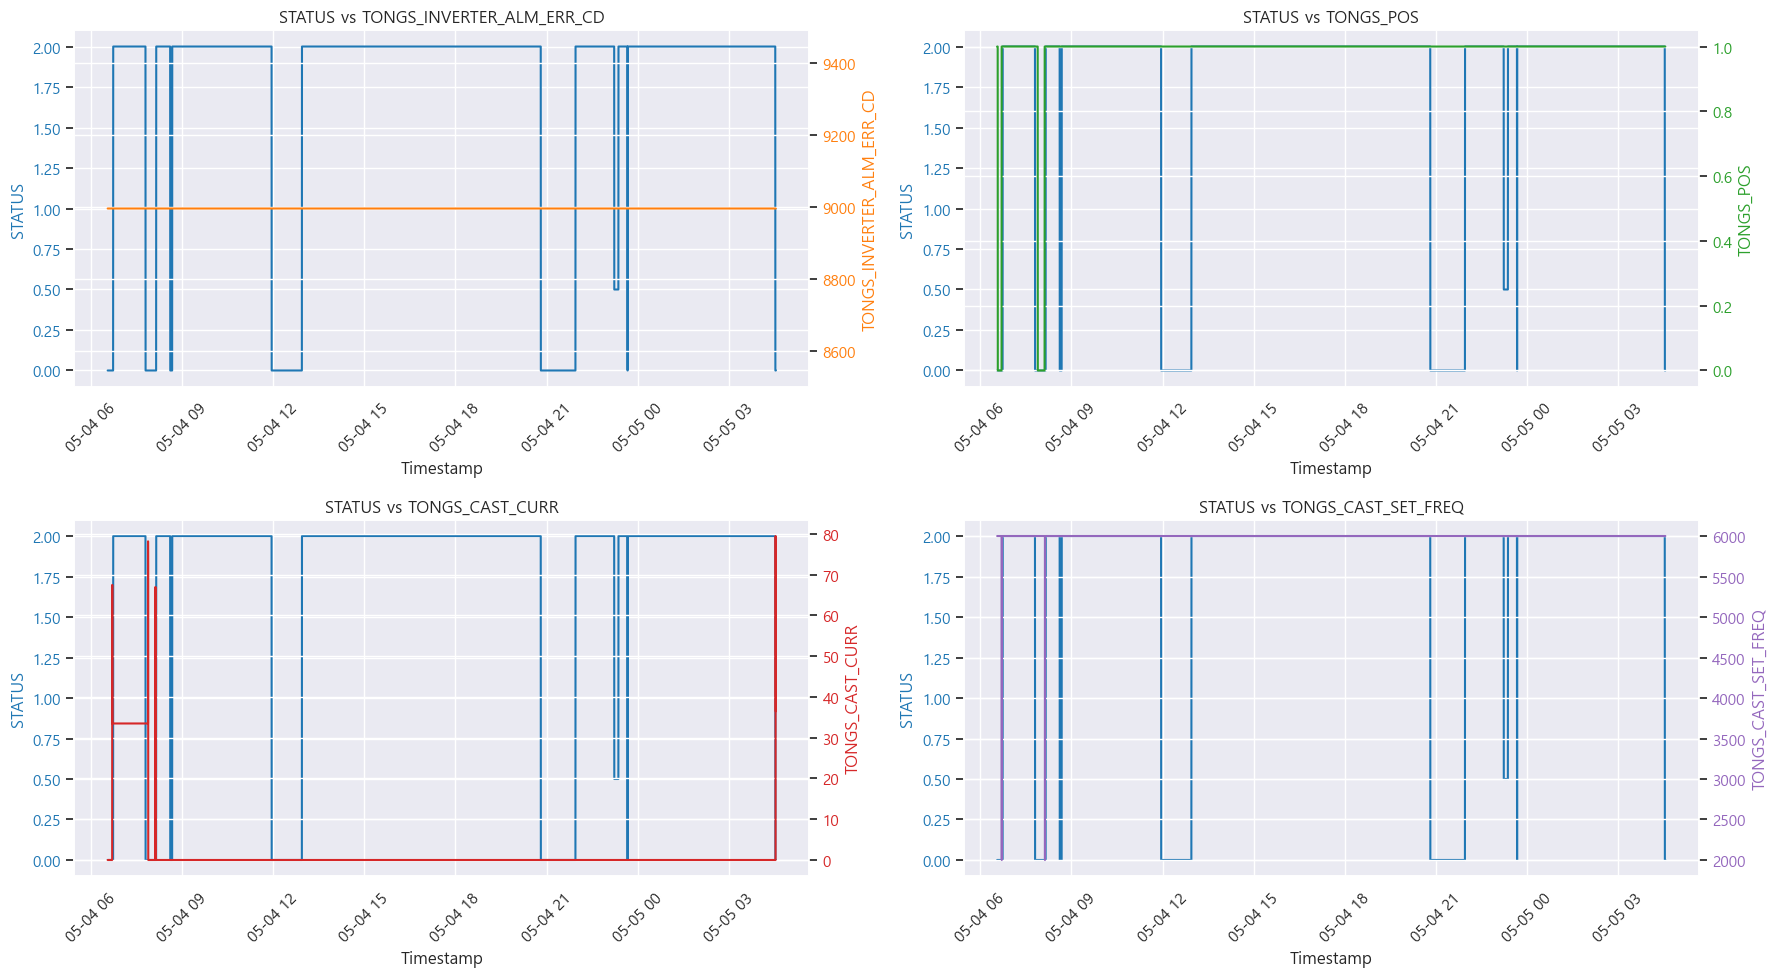

In [12]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['TONGS_INVERTER_ALM_ERR_CD', 'TONGS_POS', 'TONGS_CAST_CURR', 'TONGS_CAST_SET_FREQ']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

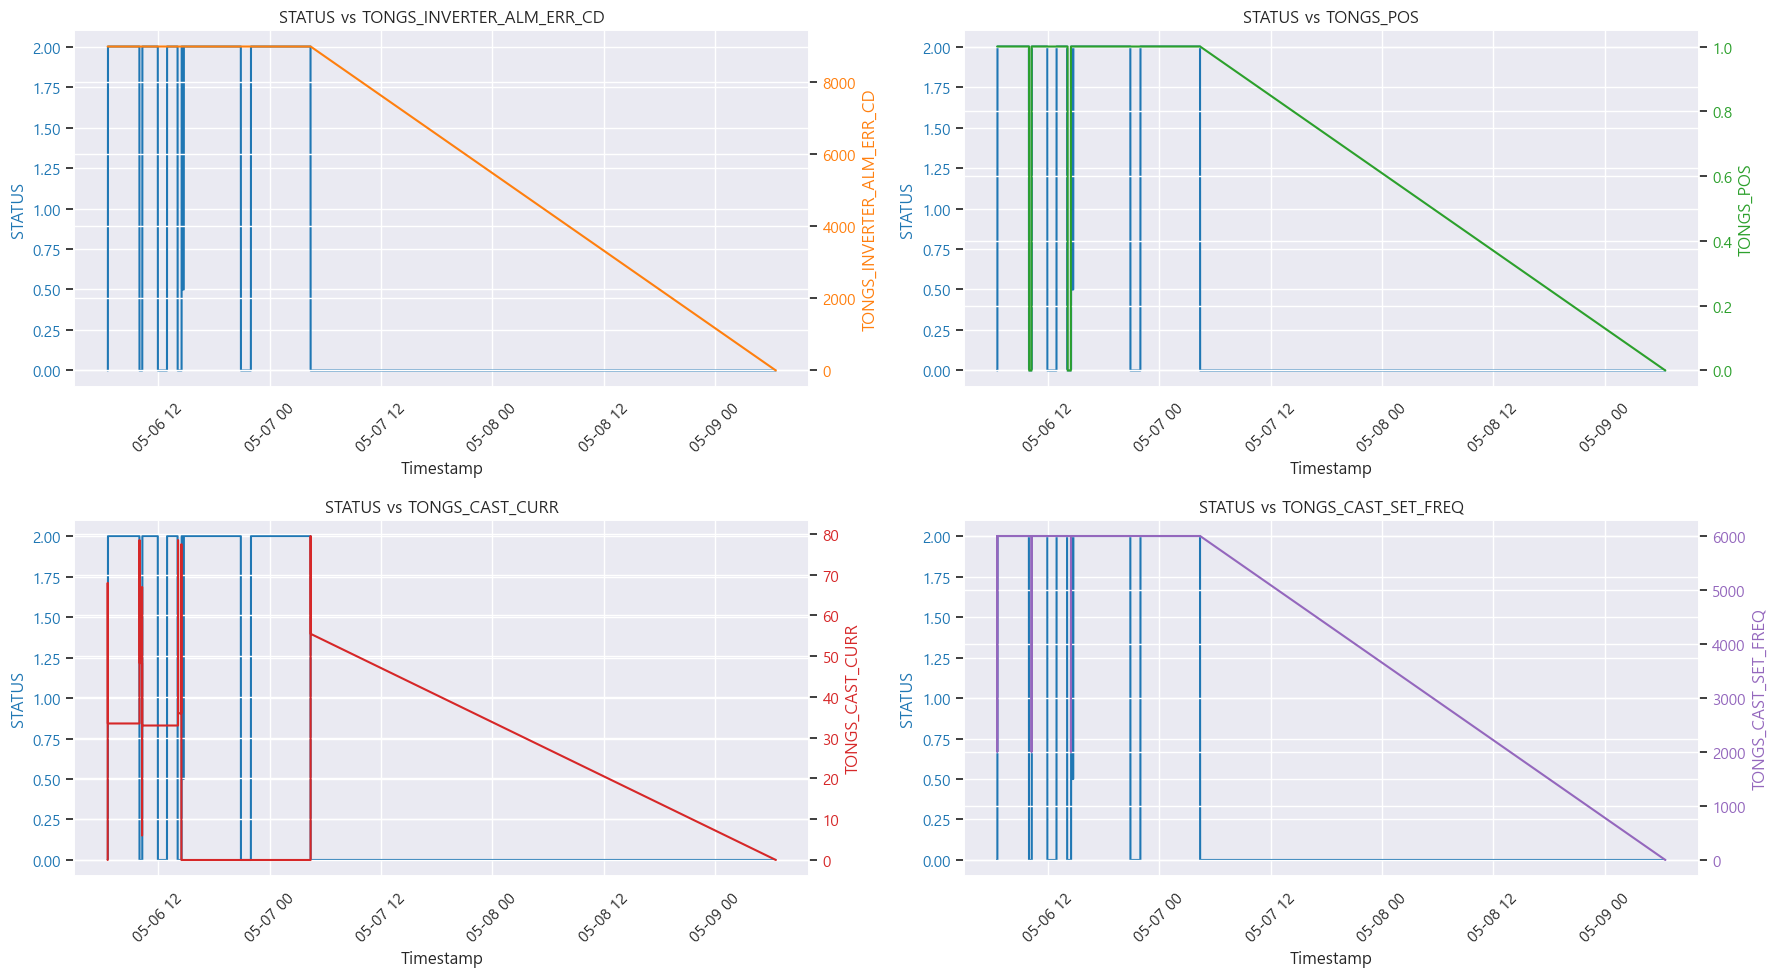

In [13]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['TONGS_INVERTER_ALM_ERR_CD', 'TONGS_POS', 'TONGS_CAST_CURR', 'TONGS_CAST_SET_FREQ']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### CUTTING

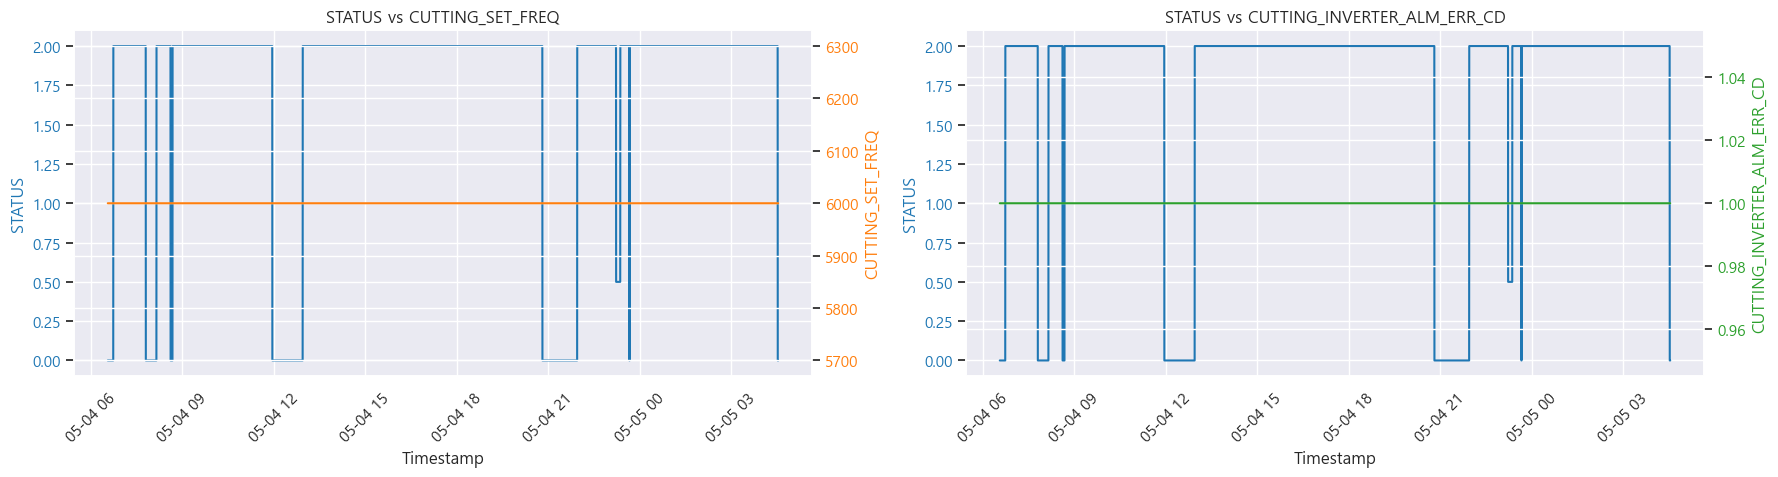

In [15]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['CUTTING_SET_FREQ', 'CUTTING_INVERTER_ALM_ERR_CD']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

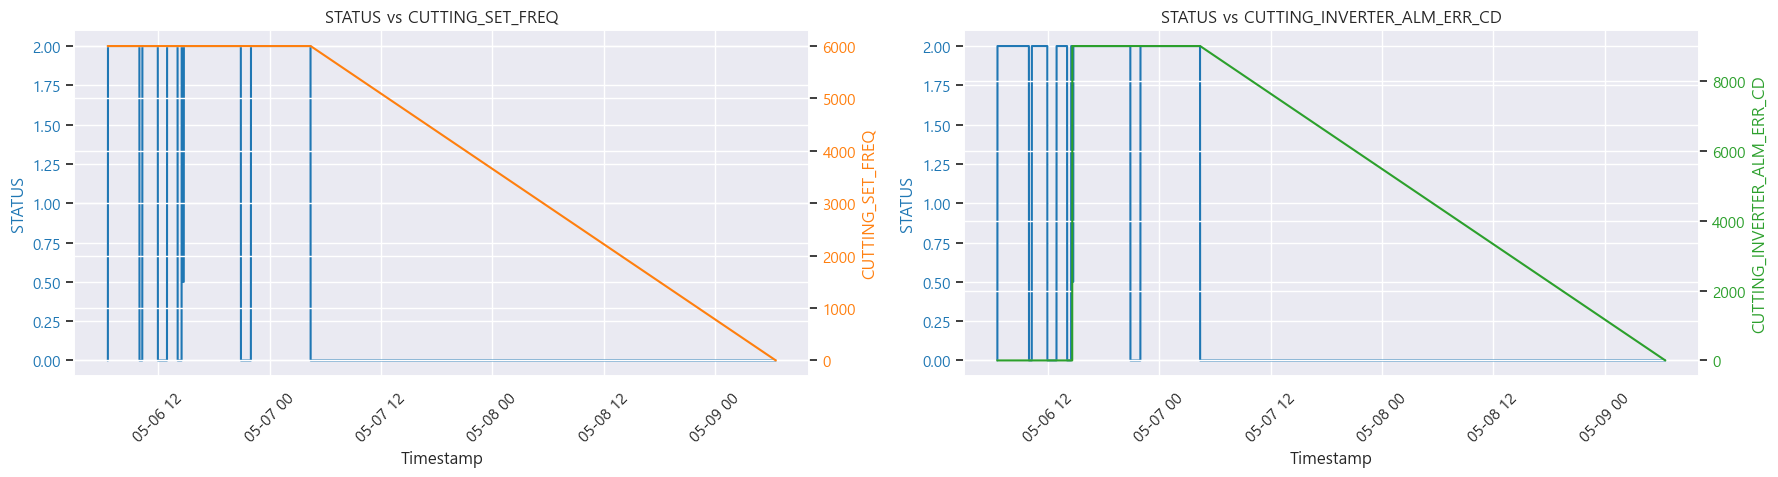

In [16]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['CUTTING_SET_FREQ', 'CUTTING_INVERTER_ALM_ERR_CD']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### TRANS

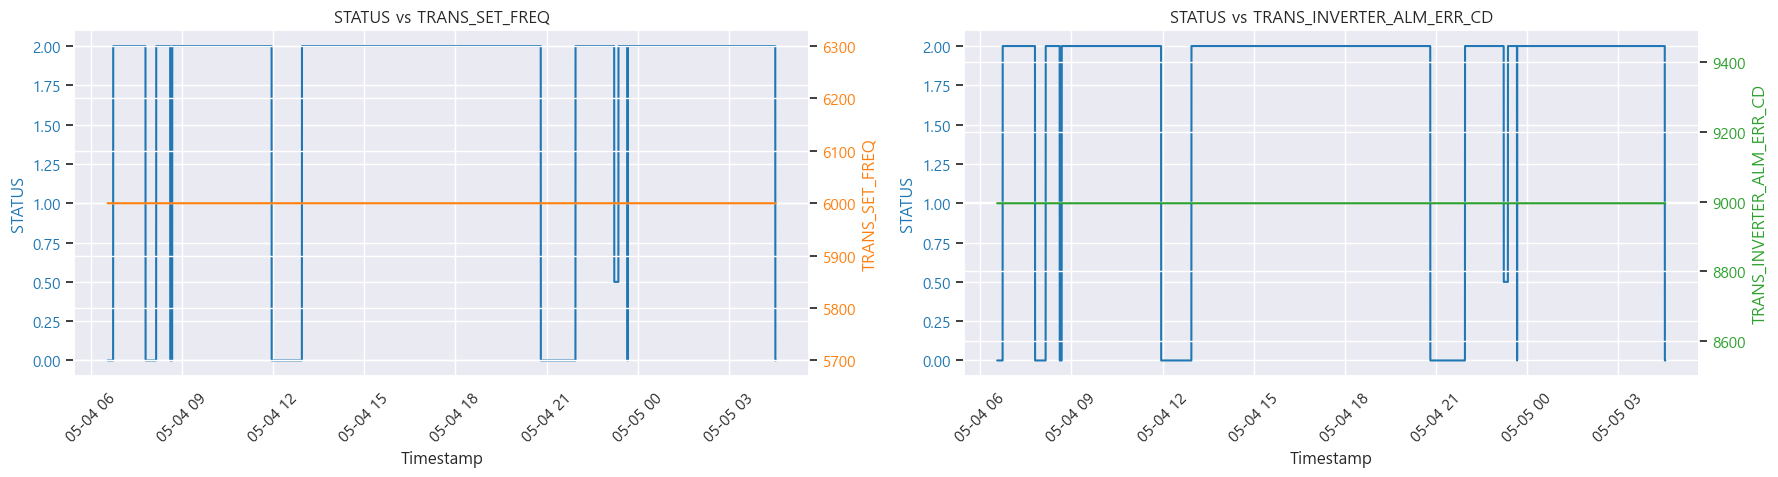

In [18]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['TRANS_SET_FREQ', 'TRANS_INVERTER_ALM_ERR_CD']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

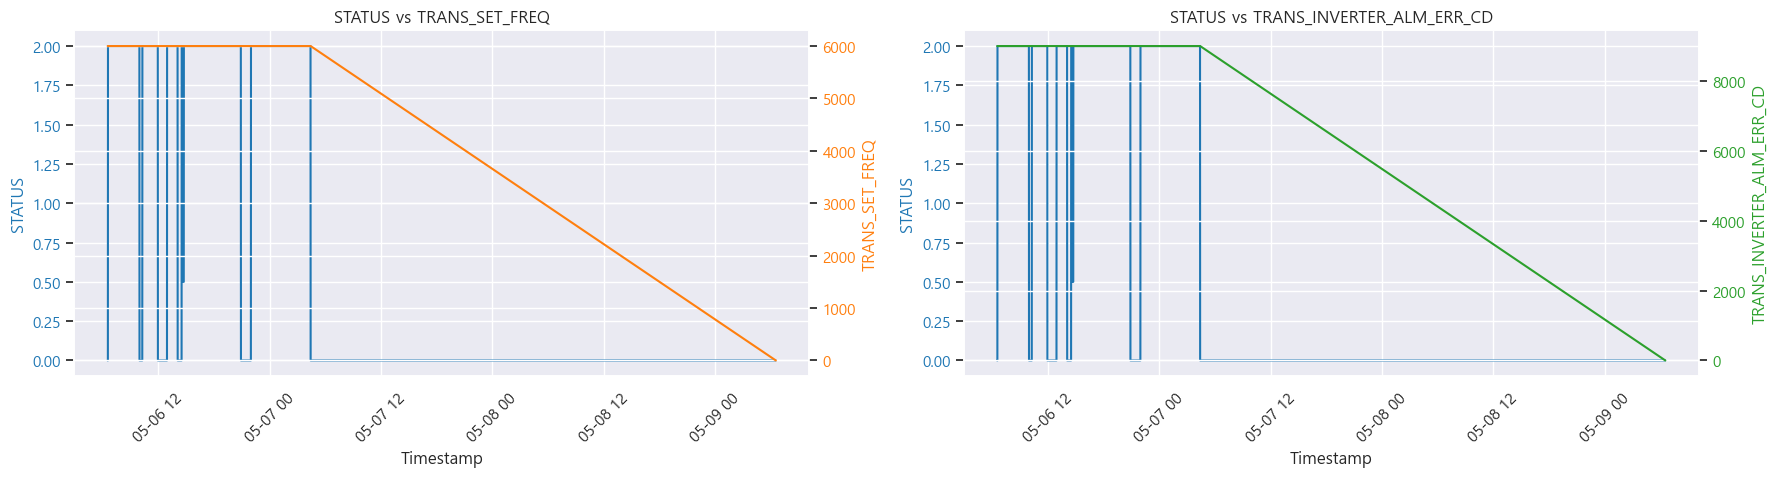

In [19]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['TRANS_SET_FREQ', 'TRANS_INVERTER_ALM_ERR_CD']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### KO1

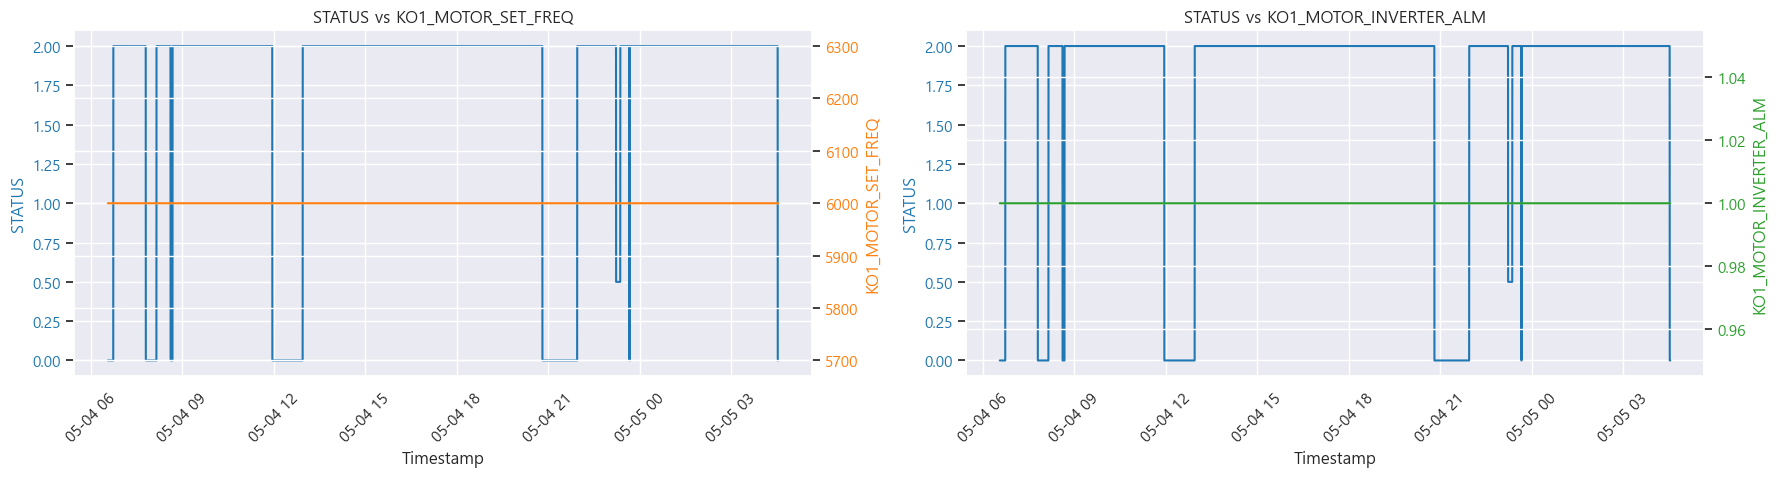

In [22]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO1_MOTOR_SET_FREQ', 'KO1_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

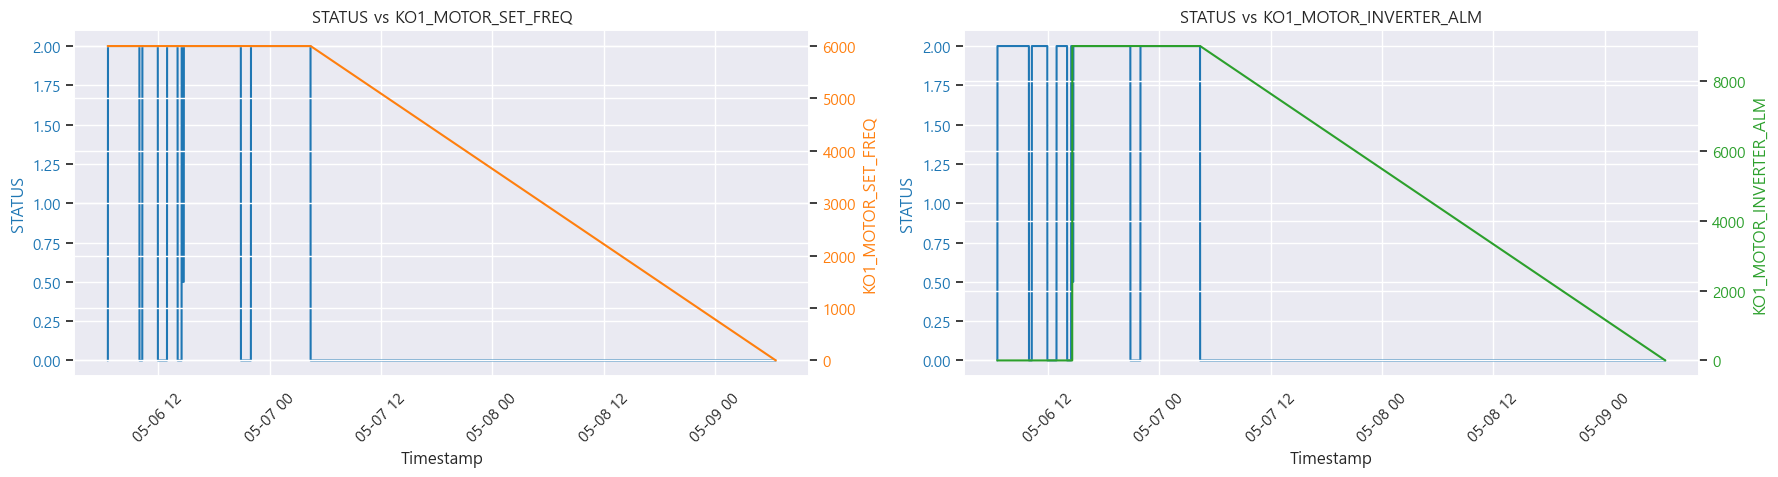

In [23]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO1_MOTOR_SET_FREQ', 'KO1_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### KO2

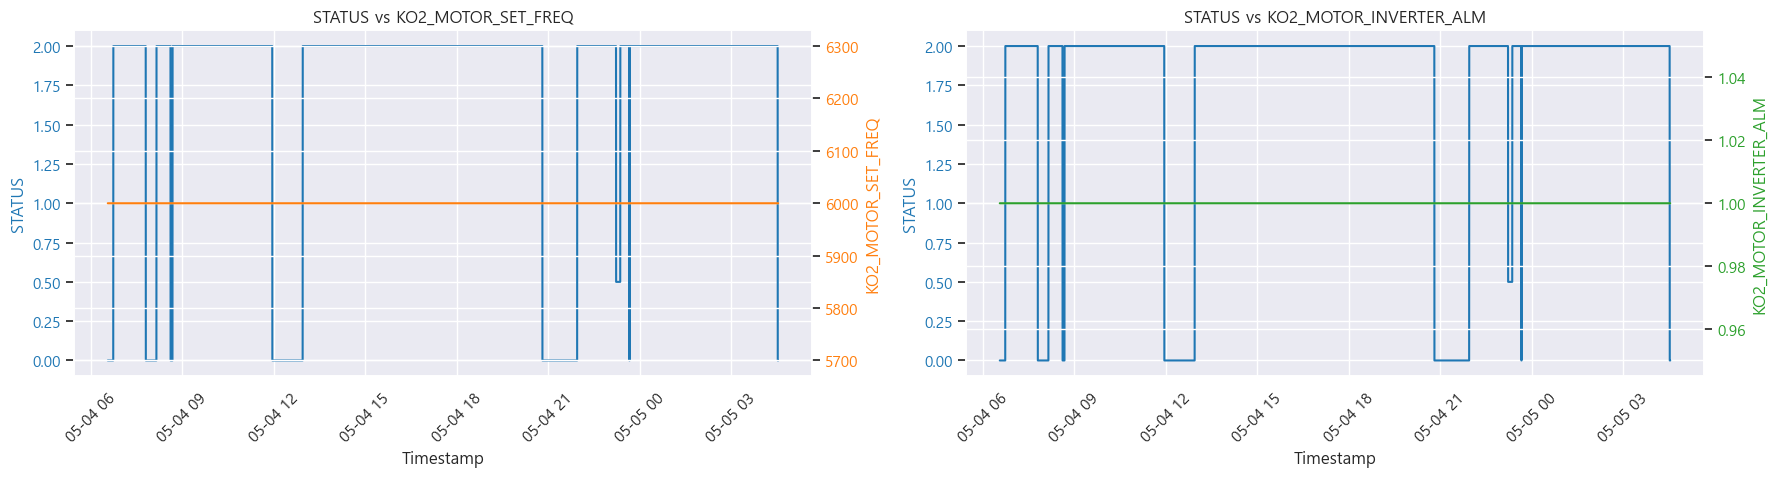

In [25]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO2_MOTOR_SET_FREQ', 'KO2_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

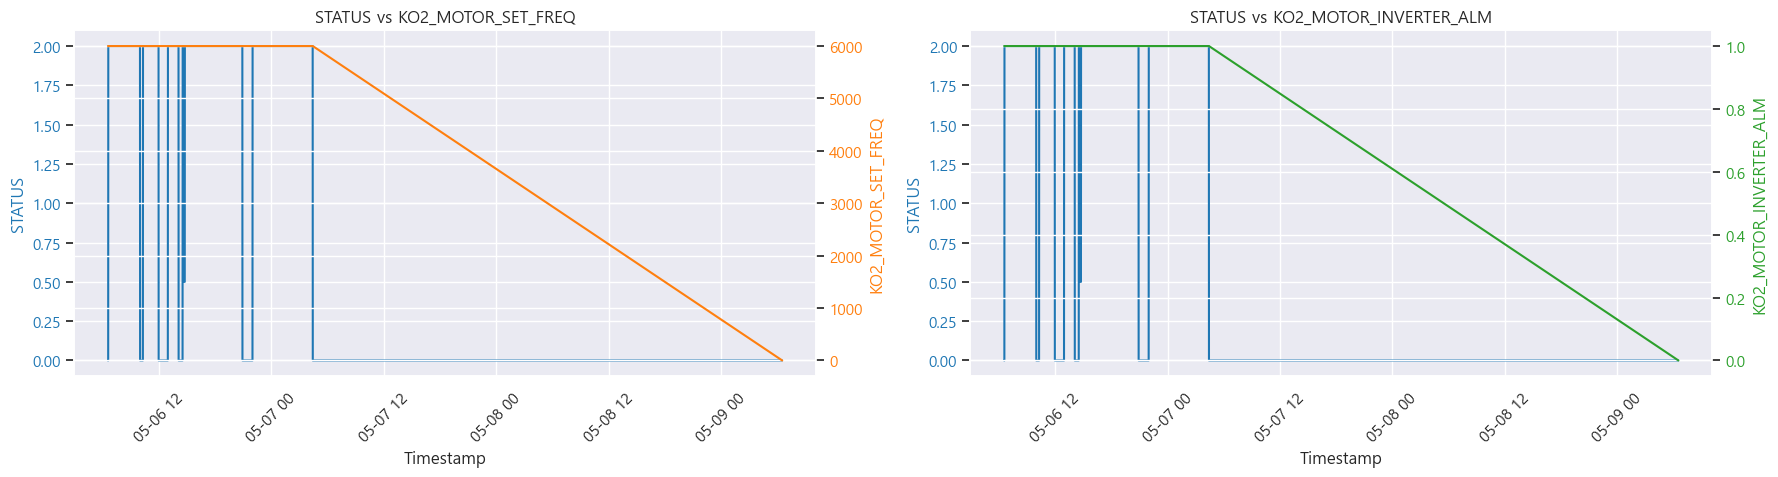

In [26]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO2_MOTOR_SET_FREQ',  'KO2_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### KO3

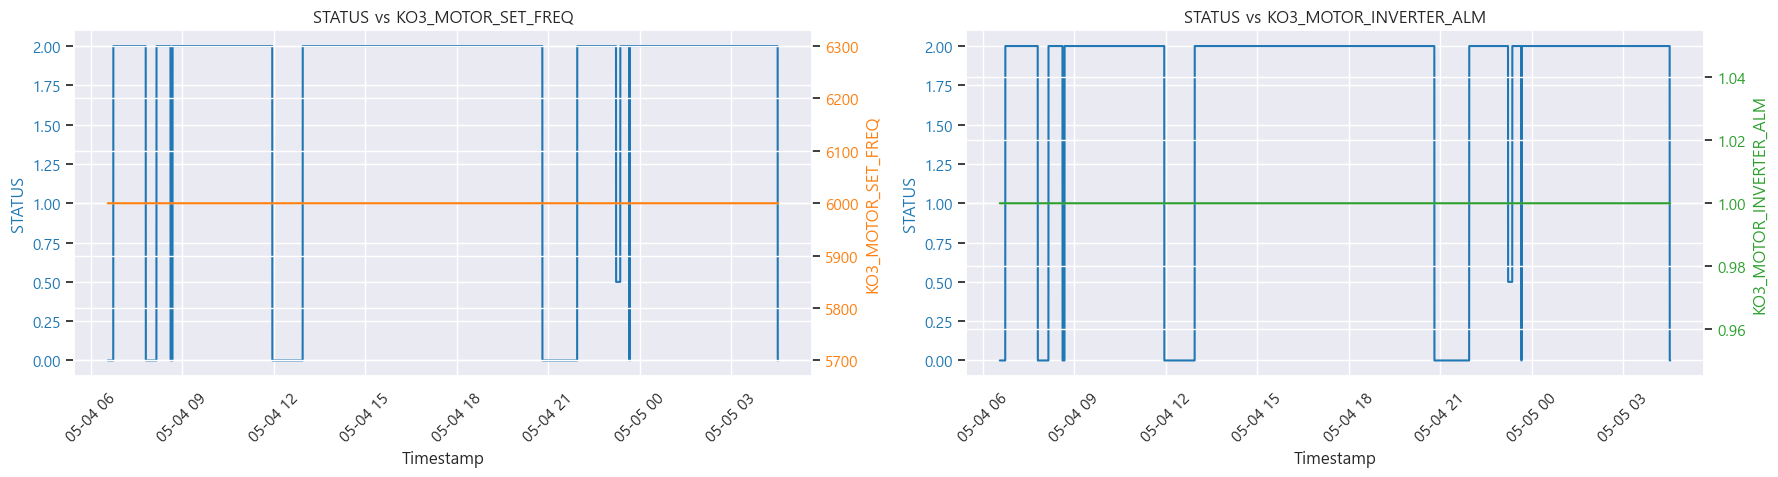

In [28]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO3_MOTOR_SET_FREQ', 'KO3_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

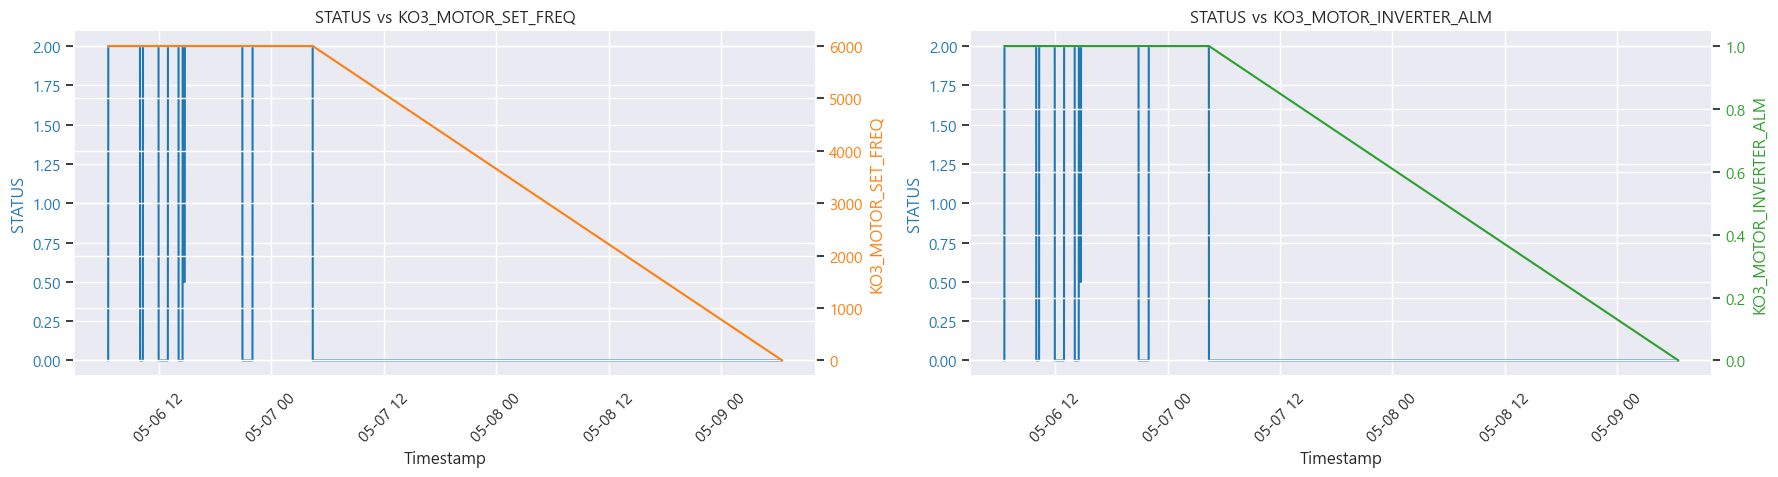

In [29]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO3_MOTOR_SET_FREQ', 'KO3_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### KO4

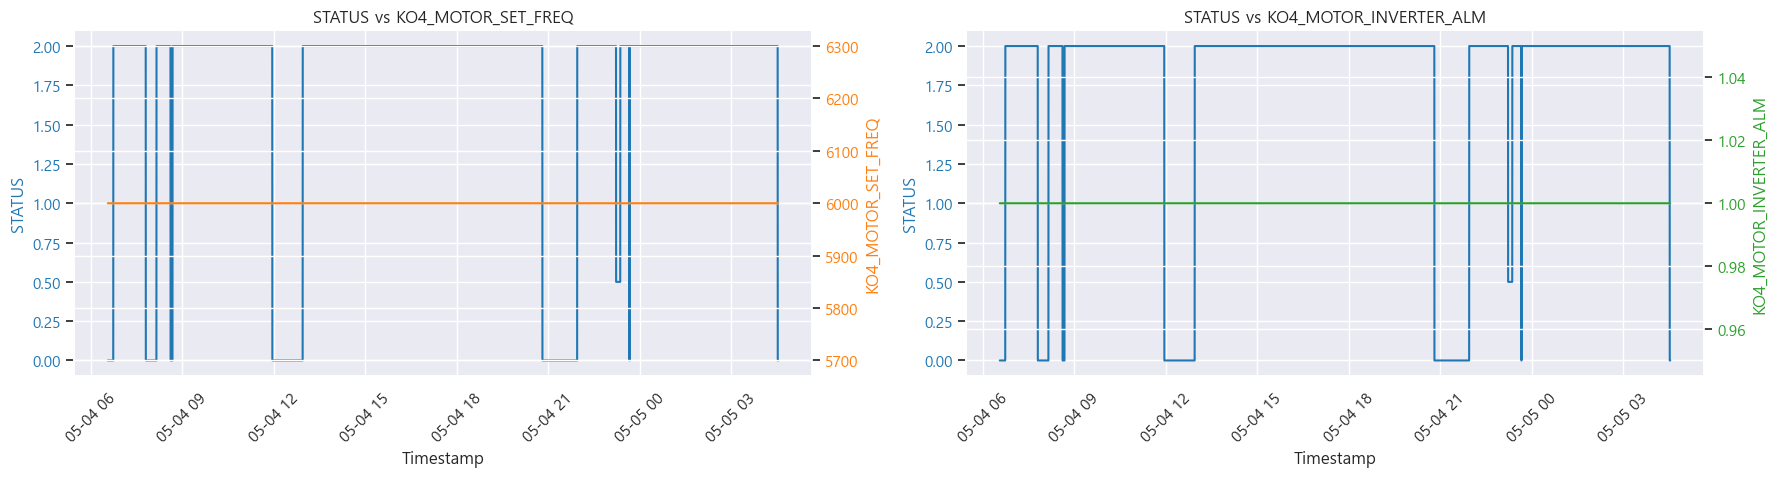

In [30]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO4_MOTOR_SET_FREQ',  'KO4_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

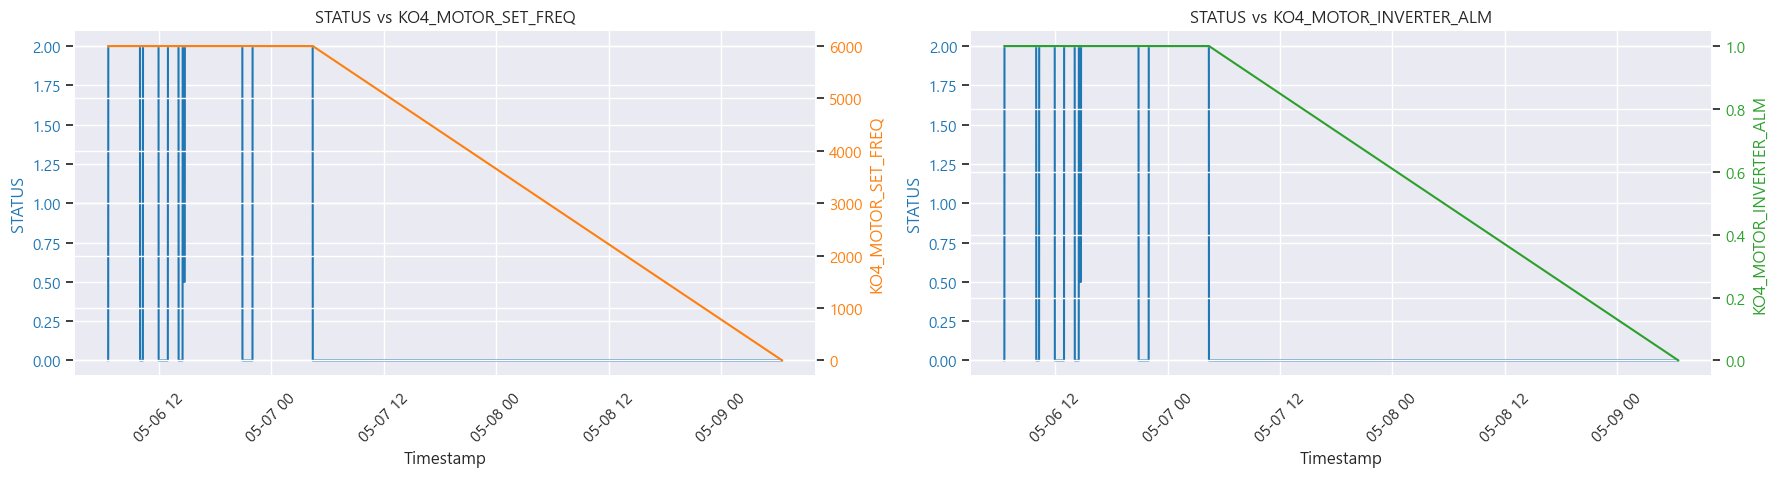

In [32]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO4_MOTOR_SET_FREQ', 'KO4_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### KO5

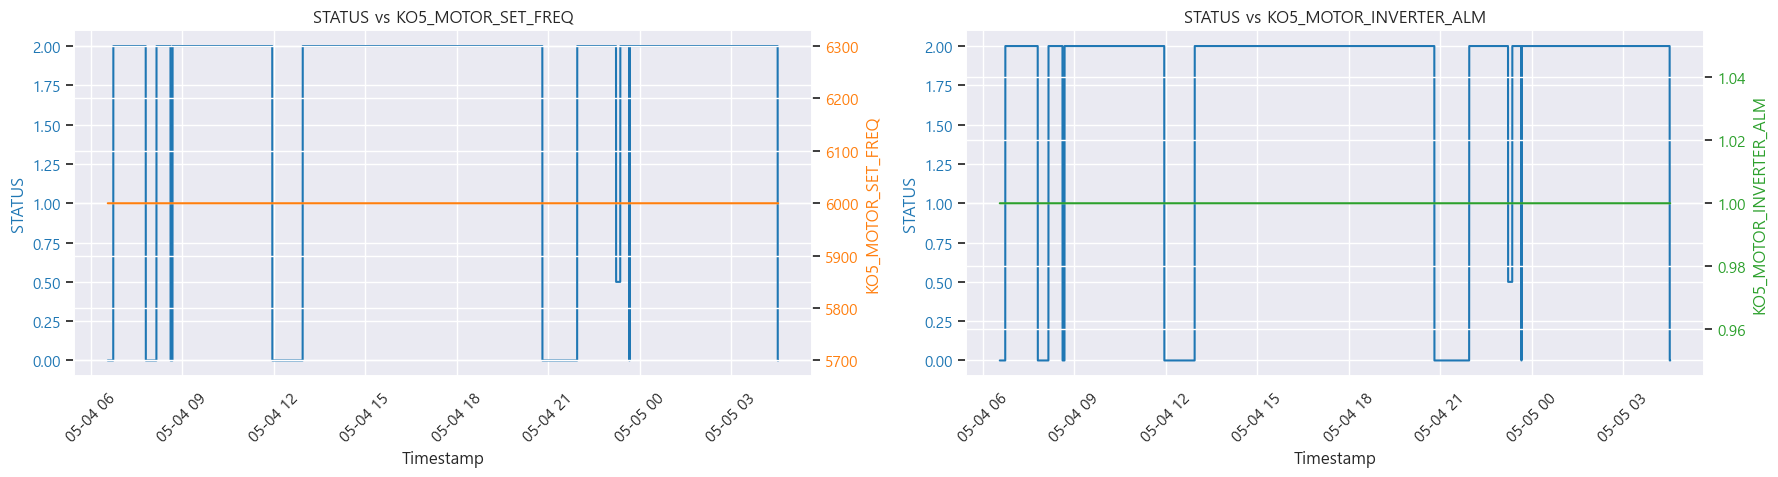

In [34]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO5_MOTOR_SET_FREQ', 'KO5_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

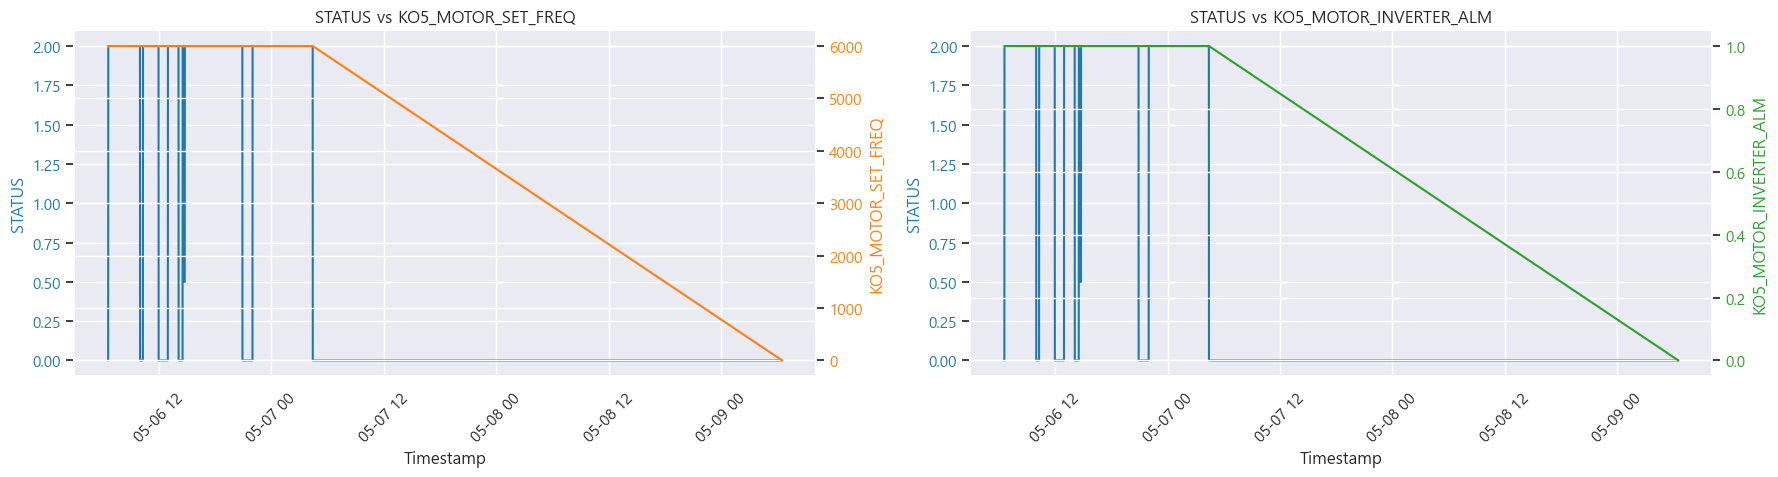

In [35]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO5_MOTOR_SET_FREQ',  'KO5_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### KO6

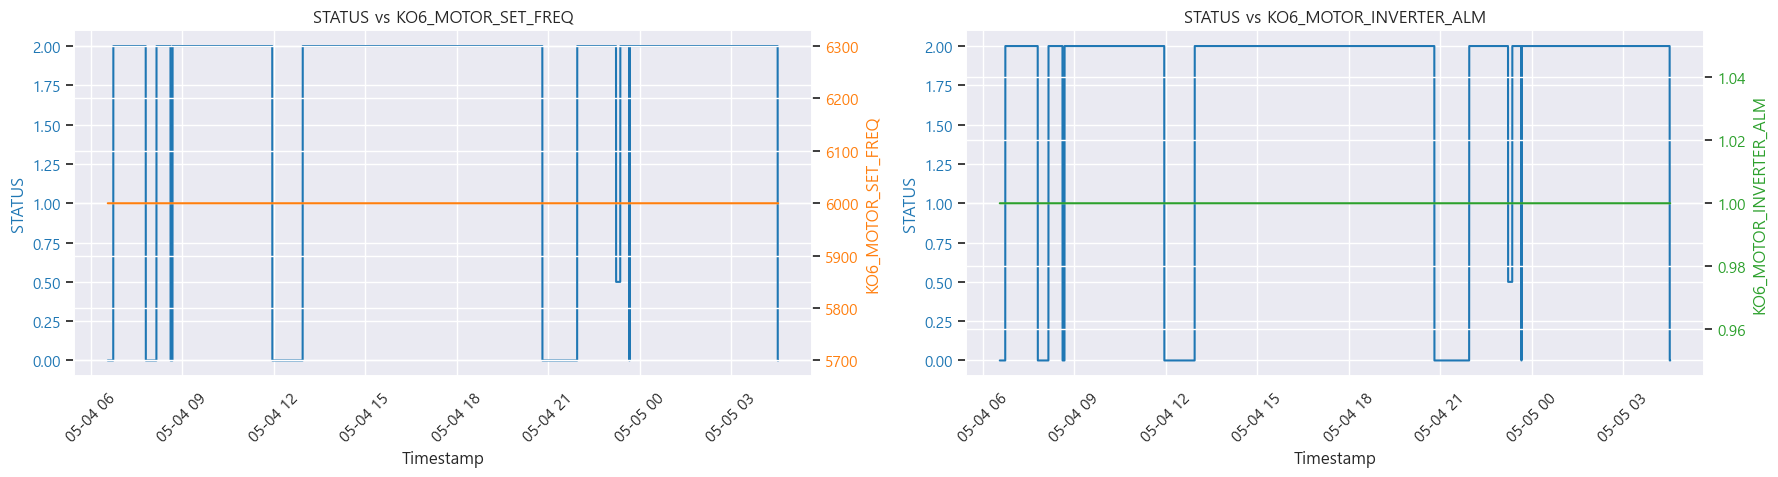

In [37]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO6_MOTOR_SET_FREQ', 'KO6_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

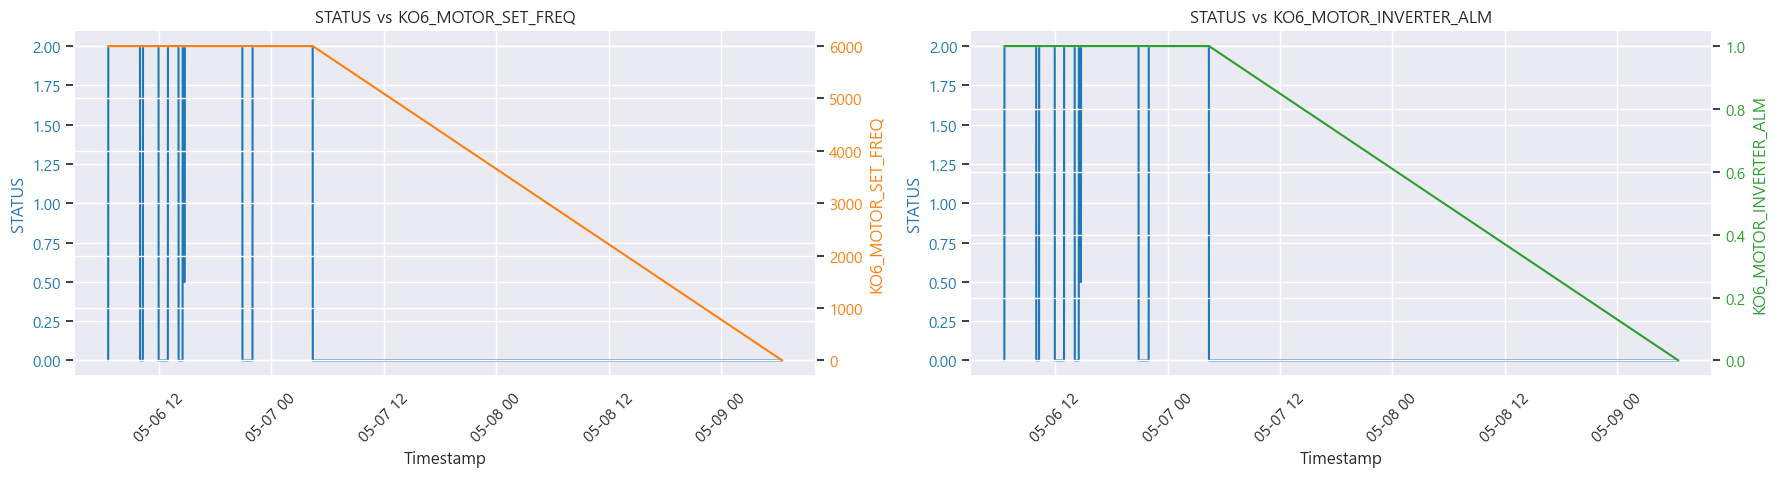

In [38]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['KO6_MOTOR_SET_FREQ',  'KO6_MOTOR_INVERTER_ALM']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### TRANS

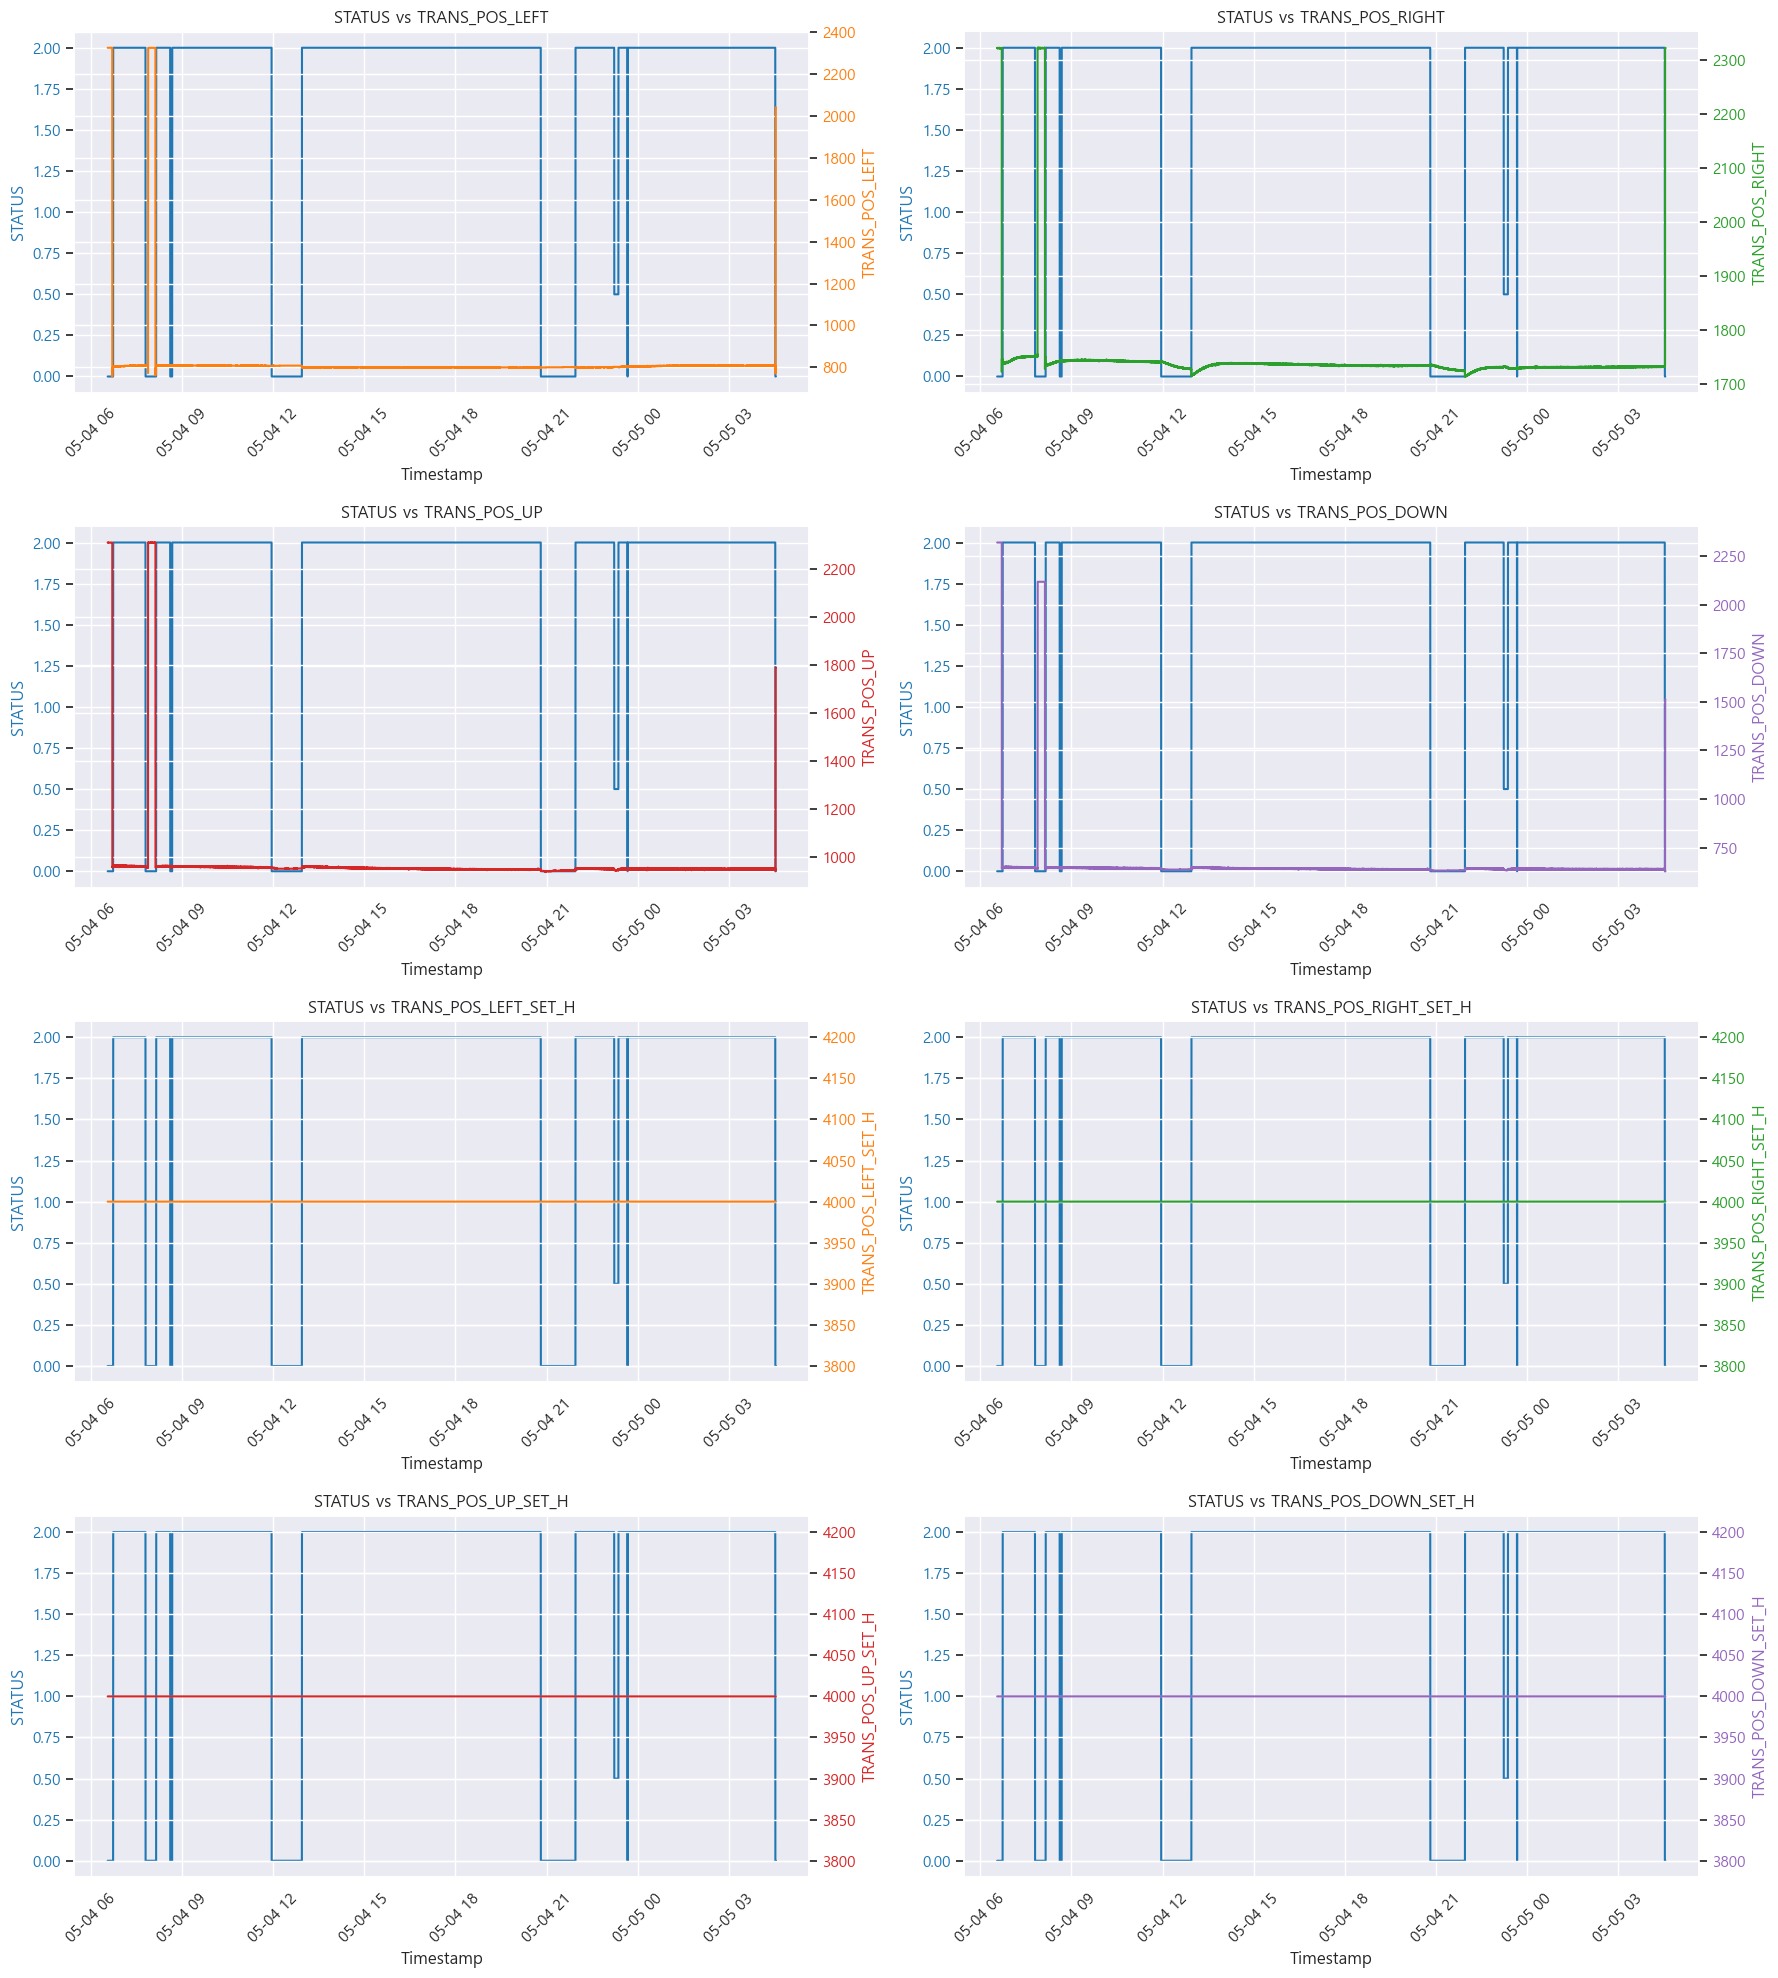

In [43]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['TRANS_POS_LEFT', 'TRANS_POS_RIGHT', 'TRANS_POS_UP', 'TRANS_POS_DOWN', 'TRANS_POS_LEFT_SET_H', 'TRANS_POS_RIGHT_SET_H' ,
                'TRANS_POS_UP_SET_H' ,'TRANS_POS_DOWN_SET_H']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

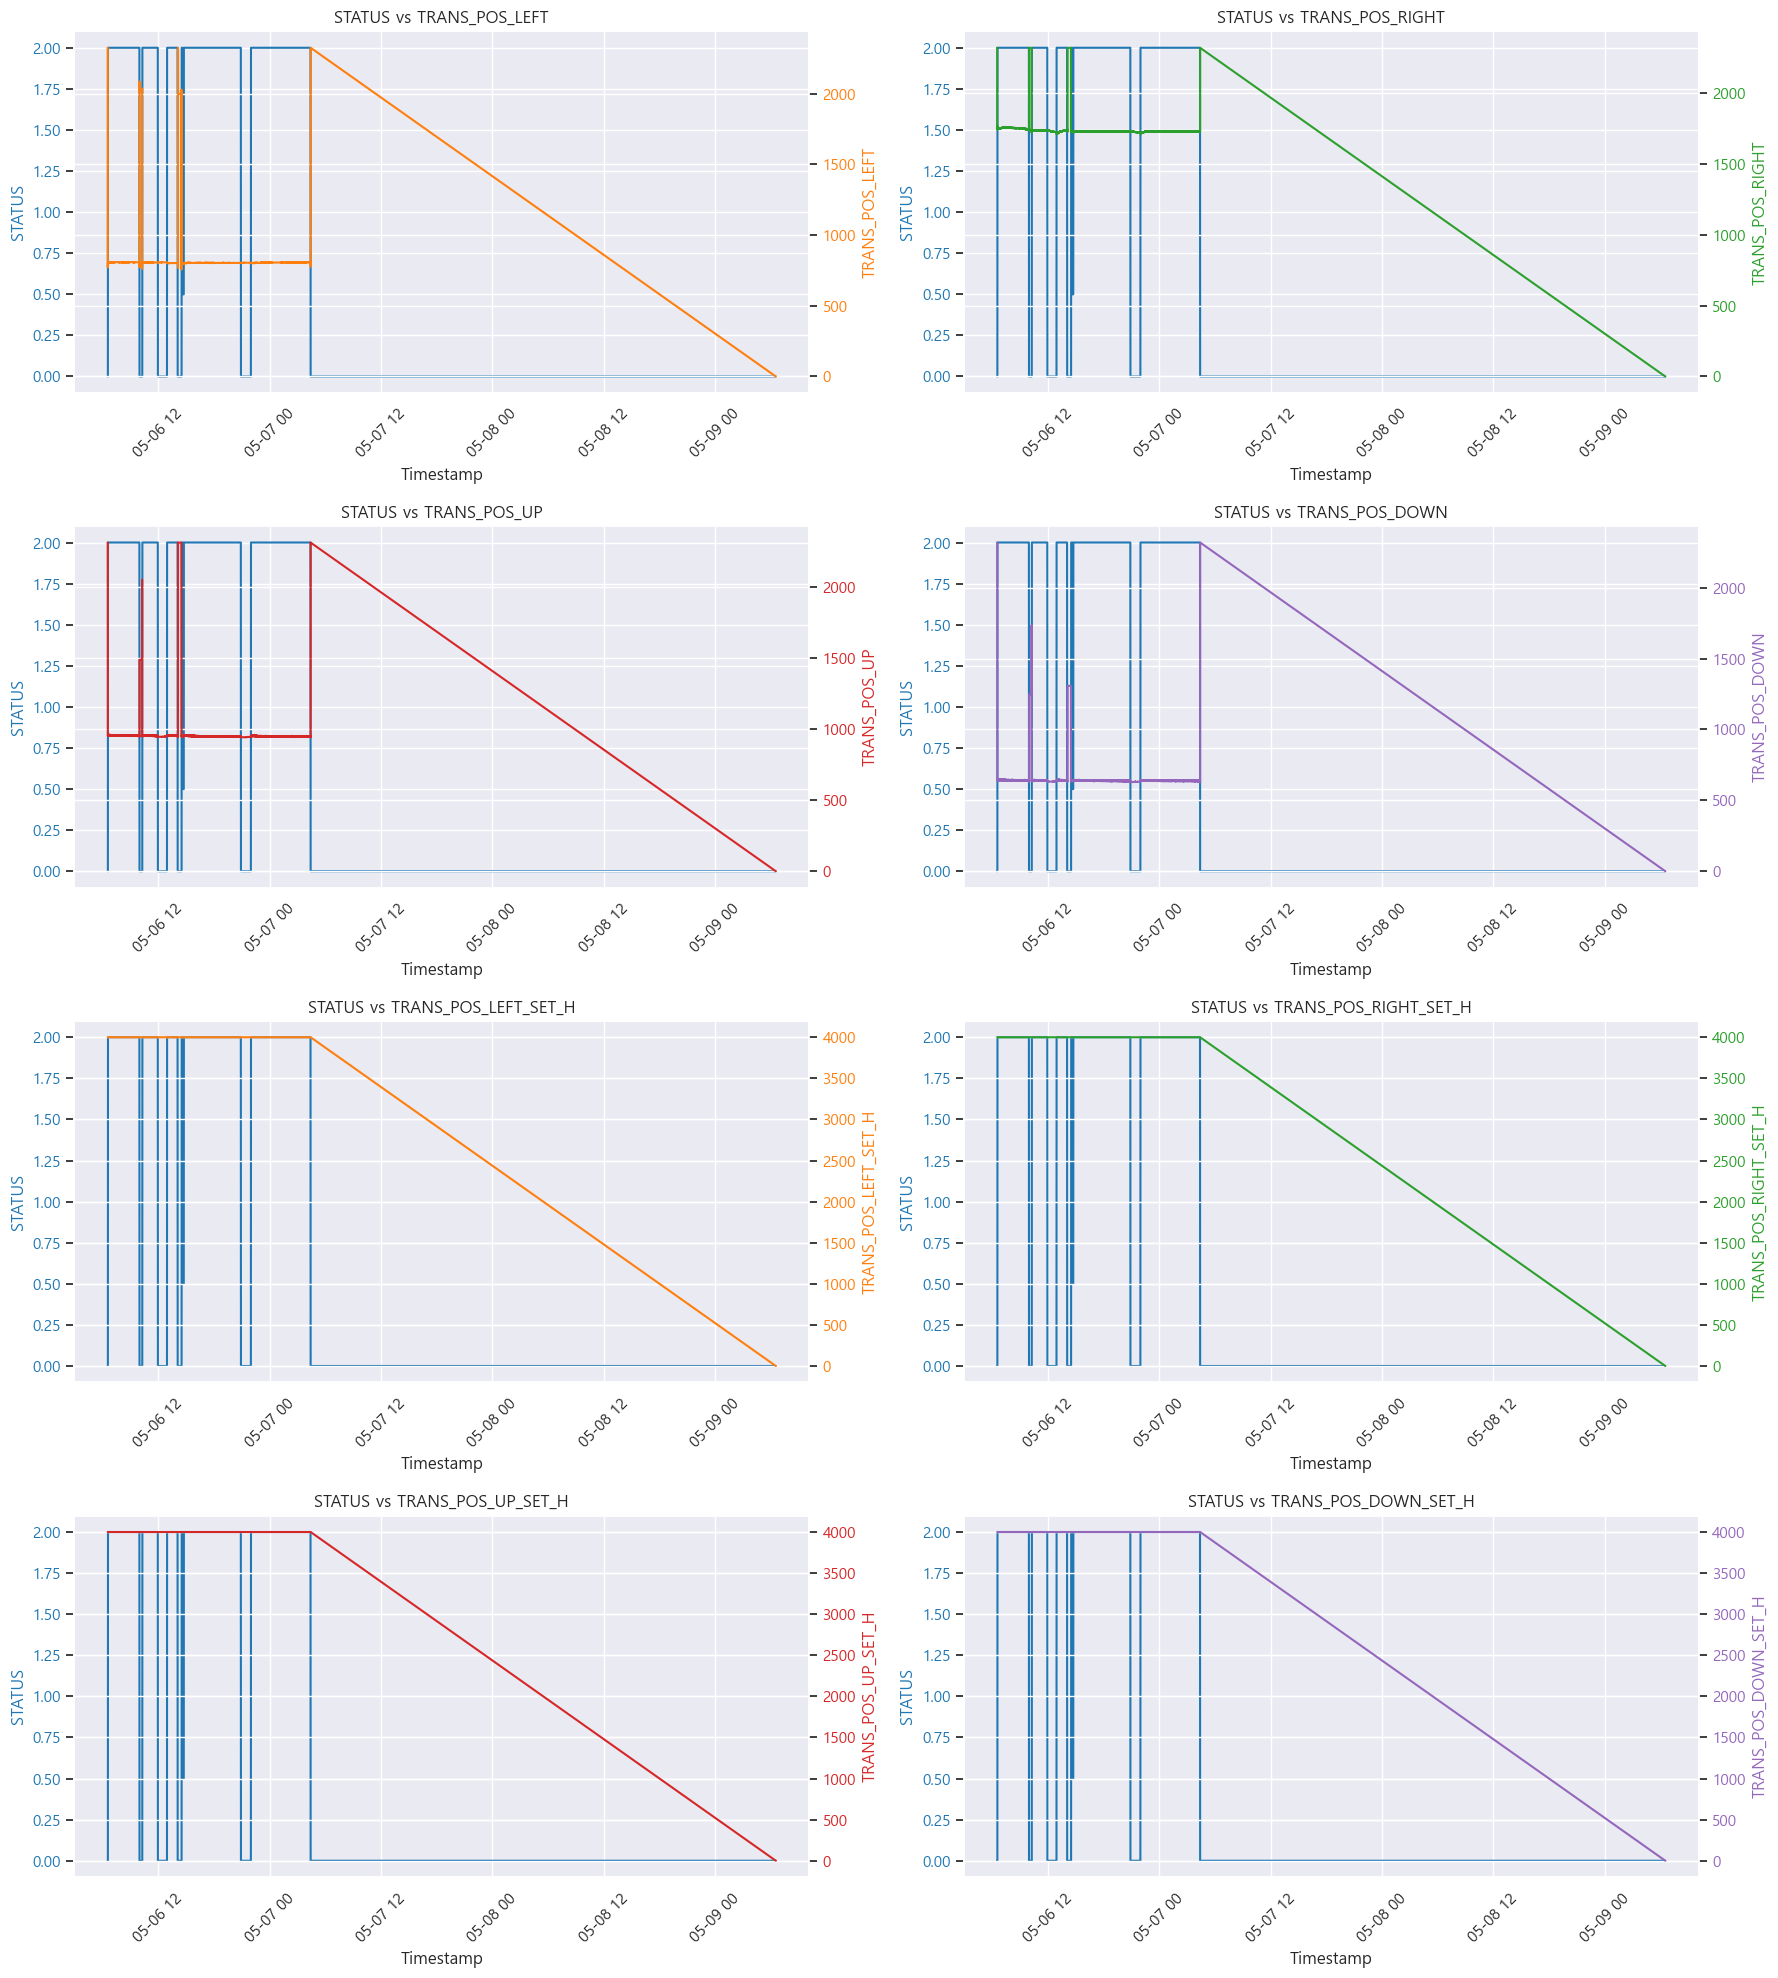

In [44]:
# ✅ 사용할 컬럼 리스트 정의
left_y_col = 'STATUS'
right_y_cols = ['TRANS_POS_LEFT', 'TRANS_POS_RIGHT', 'TRANS_POS_UP', 'TRANS_POS_DOWN', 'TRANS_POS_LEFT_SET_H', 'TRANS_POS_RIGHT_SET_H' ,
                'TRANS_POS_UP_SET_H' ,'TRANS_POS_DOWN_SET_H']  # 필요한 컬럼 추가

# ✅ Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 격자 크기 계산
num_plots = len(right_y_cols)
ncols = 2  # 한 행에 2개씩
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # 2D -> 1D 배열로 변환

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, col in enumerate(right_y_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # 왼쪽 y축
    color_left = 'tab:blue'
    ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_col], color=color_left, label=left_y_col)
    ax1.set_ylabel(left_y_col, color=color_left)
    ax1.tick_params(axis='y', labelcolor=color_left)
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)

    # 오른쪽 y축
    color_right = colors_right[i % len(colors_right)]
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], color=color_right, label=col)
    ax2.set_ylabel(col, color=color_right)
    ax2.tick_params(axis='y', labelcolor=color_right)

    ax1.set_title(f'{left_y_col} vs {col}')
    ax1.tick_params(axis='x', rotation=45)

# 빈 subplot 숨기기 (만약 right_y_cols 수가 홀수일 경우)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()